In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to perform T-SNE
from sklearn.manifold import TSNE

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore

from sklearn.linear_model import LinearRegression

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.model_selection  import train_test_split



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Python Course/Unsupervised Learning/Unsupervised Learning _ Hands-on Quiz/Nutrient Composition Dataset.csv")

In [4]:
data.shape

(1746, 6)

In [5]:
data.sample(n=10, random_state=1)

,S.No,Protein,Fat,vitaminC,Fibre,Product
1010,1011,0.614665,0.510073,0.214064,0.524125,Unknown
1582,1583,0.195084,1.115830,0.343721,2.090546,Unknown
47,48,1.968254,2.021698,1.939700,0.477417,"Beef, flank, steak, separable lean and fat, tr..."
304,305,0.696060,1.019934,0.019482,1.397657,"Fish, grouper, mixed species, cooked, dry heat"
534,535,0.527657,1.094110,0.626695,0.913215,"Soup, chicken, canned, chunky, ready-to-serve"
1123,1124,0.314936,1.591978,2.326061,0.589619,"Sorghum flour, whole-grain"
48,49,1.238637,0.299298,0.885492,0.192939,"Bagels, plain, enriched, with calcium propiona..."
1584,1585,0.580090,0.749004,1.846543,1.197012,Unknown
302,303,0.259065,1.076730,1.601190,1.038443,"Cereals, CREAM OF WHEAT, instant, prepared wit..."
1032,1033,0.336195,1.275768,0.675253,0.538106,Unknown


In [13]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fibre     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [15]:
df.describe()

,S.No,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,873.500000,0.922470,0.900091,0.900146,0.900830
std,504.171102,0.627128,0.634617,0.623847,0.626875
min,1.000000,0.000128,0.000267,0.000029,0.002579
25%,437.250000,0.435853,0.394784,0.419103,0.389124
50%,873.500000,0.813025,0.804687,0.796290,0.820783
75%,1309.750000,1.295106,1.298988,1.280870,1.295732
max,1746.000000,4.016890,3.979364,4.013322,3.570331


In [16]:
df.describe(include=object)

,Product
count,1746
unique,834
top,Unknown
freq,913


In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

S.No        0
Protein     0
Fat         0
vitaminC    0
Fibre       0
Product     0
dtype: int64

In [19]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'S.No' are 

 [   1    2    3 ... 1744 1745 1746]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Protein' are 

 [0.45236868 2.3210872  0.88455361 ... 0.5971295  0.74802556 2.01379933]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Fat' are 

 [1.17092633 0.70685626 1.18657053 ... 0.72793444 1.7224059  0.576179  ]
----------------------------------------------------------------------------------------------------
Unique values in the column 'vitaminC' are 

 [1.07927082 0.35008841 2.42854436 ... 1.03158703 1.31992881 0.51599781]
----------------------------------------------------------------------------------------------------
Unique values in the column 'Fibre' are 

 [1.70296005 0.65824859 1.98456214 ... 0.25549611 0.92039147 1.53669414]
-------------------------------------------------------

In [23]:
df["S.No"].nunique()

1746

In [27]:
df1=df.drop(columns=['S.No', 'Product'], axis=1).copy()

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Protein   1746 non-null   float64
 1   Fat       1746 non-null   float64
 2   vitaminC  1746 non-null   float64
 3   Fibre     1746 non-null   float64
dtypes: float64(4)
memory usage: 54.7 KB


In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

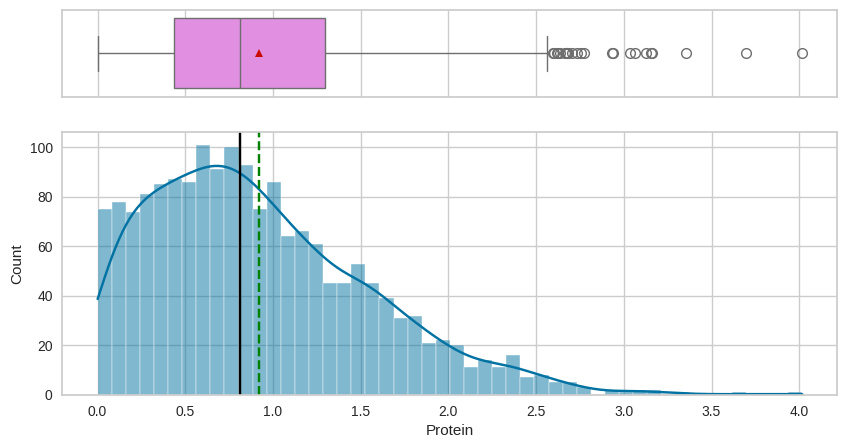

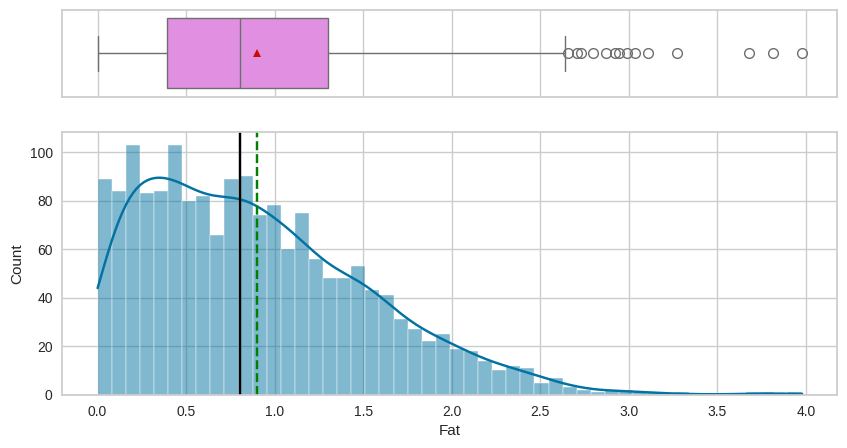

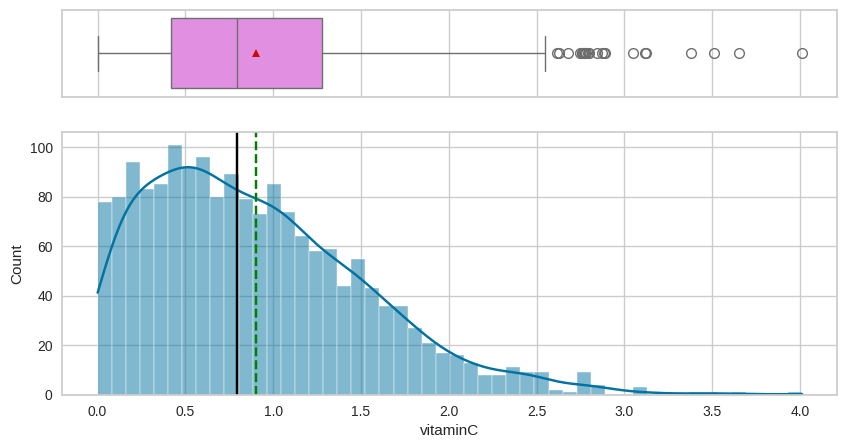

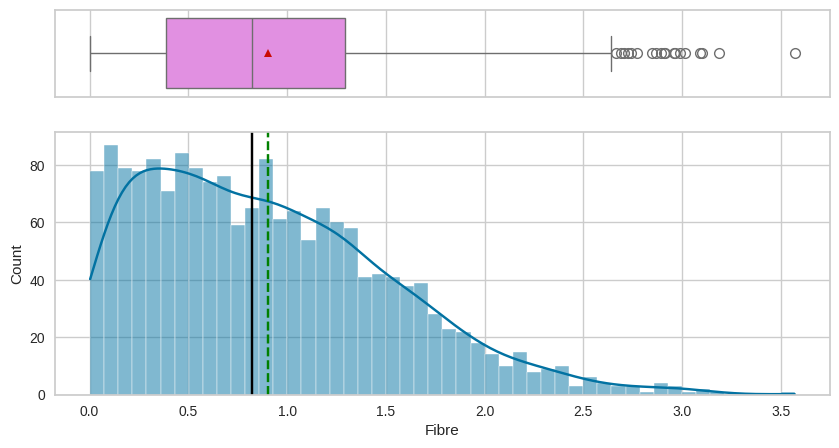

In [29]:
# selecting numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df1, item, bins=50, kde=True, figsize=(10, 5))

In [56]:
df1['Protein'].quantile(0.75) - df1['Protein'].quantile(0.25)

0.8592526325000001

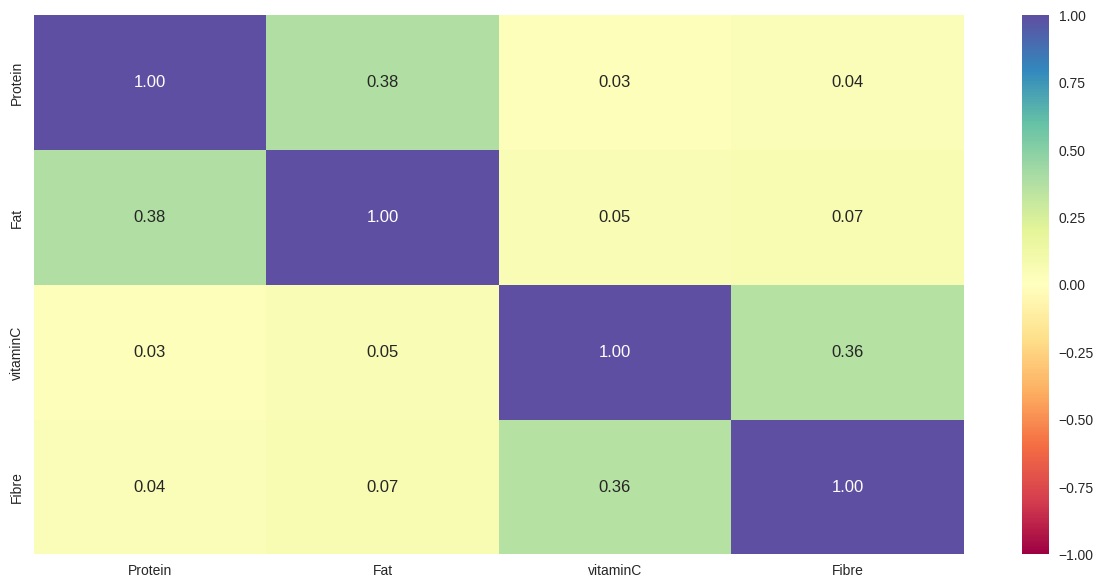

In [30]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

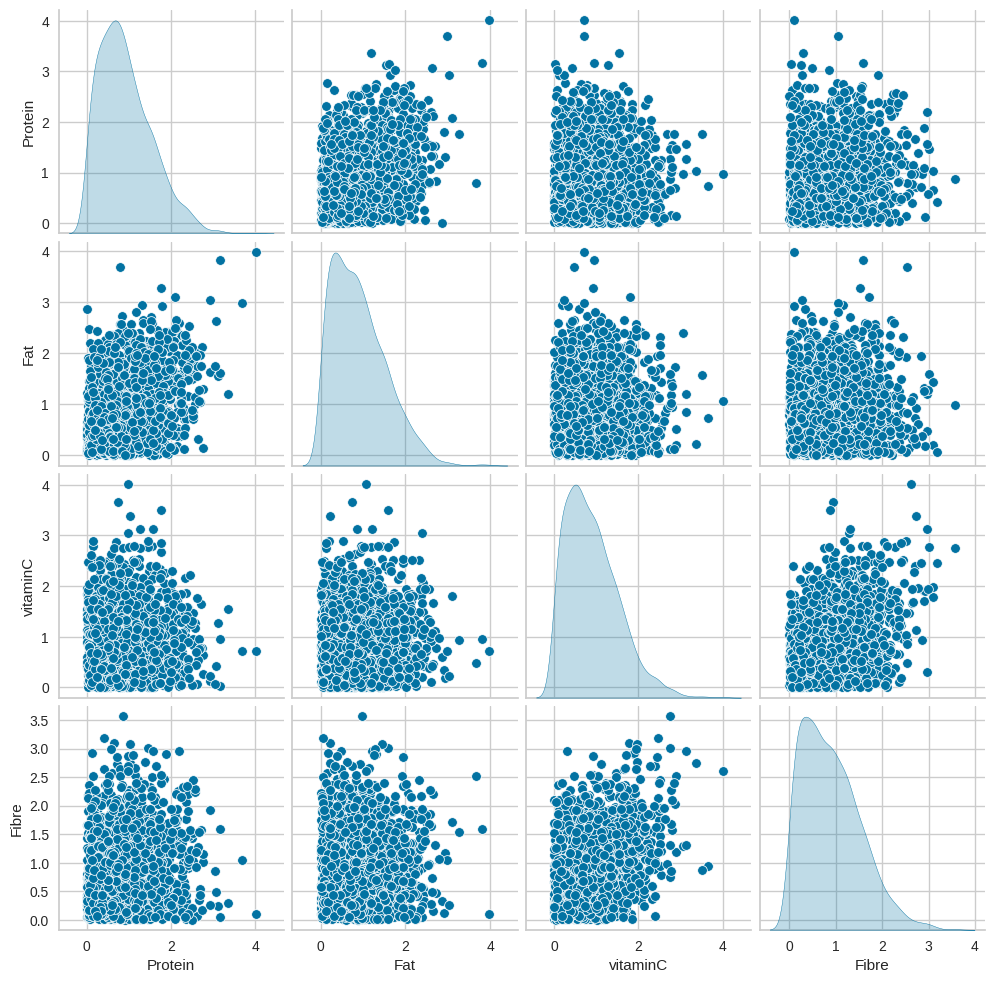

In [31]:
sns.pairplot(df1, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [32]:
XScaled=df1.apply(zscore)
XScaled.head()

,Protein,Fat,vitaminC,Fibre
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

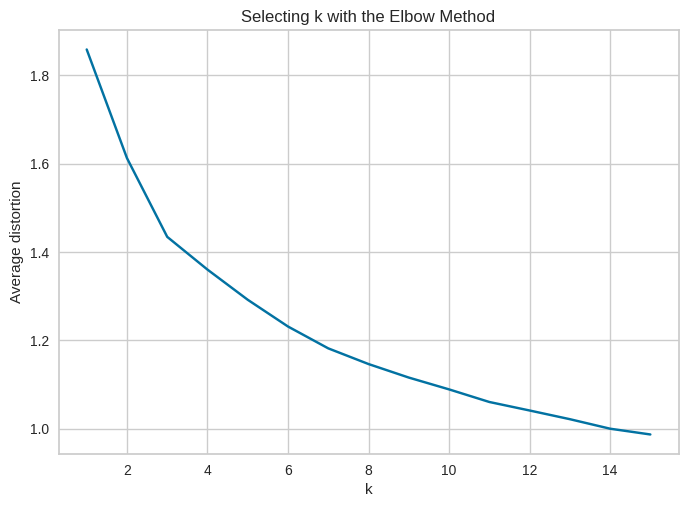

In [37]:
#Finding optimal no. of clusters
clusters=range(1,16)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, random_state=1)
    model.fit(XScaled)
    prediction=model.predict(XScaled)
    meanDistortions.append(sum(np.min(cdist(XScaled, model.cluster_centers_, 'euclidean'), axis=1)) / XScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


For n_clusters = 2, silhouette score is 0.25496367847338175
For n_clusters = 3, silhouette score is 0.2531861555258712
For n_clusters = 4, silhouette score is 0.20491939596109465
For n_clusters = 5, silhouette score is 0.19745041333696137
For n_clusters = 6, silhouette score is 0.207259377989639
For n_clusters = 7, silhouette score is 0.20880440017330534
For n_clusters = 8, silhouette score is 0.20967229666664064
For n_clusters = 9, silhouette score is 0.21157601984087682
For n_clusters = 10, silhouette score is 0.21061445331916362
For n_clusters = 11, silhouette score is 0.20149616154781075
For n_clusters = 12, silhouette score is 0.20037003393863342
For n_clusters = 13, silhouette score is 0.19848439554137132
For n_clusters = 14, silhouette score is 0.18887134549630646
For n_clusters = 15, silhouette score is 0.1811877654243162


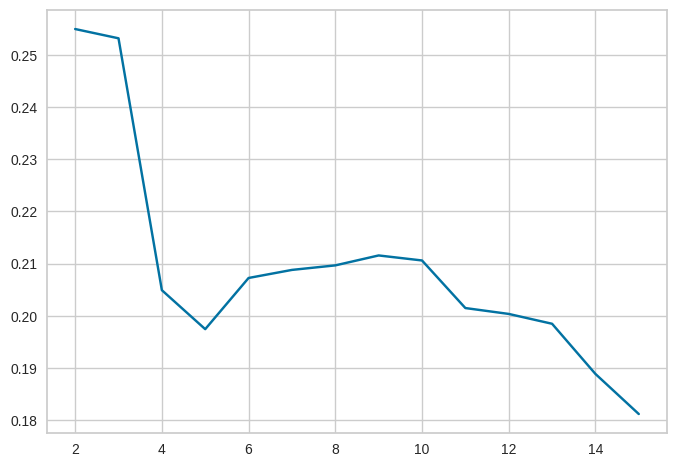

In [38]:
sil_score = []
cluster_list = list(range(2, 16))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((XScaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(XScaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

In [39]:
# Let us first start with K = 3
final_model=KMeans(3, random_state=1)
final_model.fit(XScaled)
prediction=final_model.predict(XScaled)

#Append the prediction
df1["GROUP"] = prediction
XScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df1.head()

Groups Assigned : 



,Protein,Fat,vitaminC,Fibre,GROUP
0,0.452369,1.170926,1.079271,1.702960,0
1,2.321087,0.706856,0.350088,0.658249,1
2,0.884554,1.186571,2.428544,1.984562,0
3,0.715501,0.577599,0.270925,0.369266,2
4,0.132610,0.544521,0.116884,0.557309,2


In [42]:
df1.nunique()

Protein     1746
Fat         1746
vitaminC    1746
Fibre       1746
GROUP          3
dtype: int64

In [43]:
cluster_profile = df1.groupby("GROUP").mean()

In [44]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("GROUP")["Protein"].count().values
)

In [45]:
cluster_profile

,Protein,Fat,vitaminC,Fibre,count_in_each_segments
GROUP,,,,,
0,0.768839,0.804329,1.558258,1.549467,440
1,1.552066,1.556525,0.791801,0.824236,487
2,0.630631,0.561205,0.611007,0.597900,819


In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(XScaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(XScaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7151090605156318.
Cophenetic correlation for complete linkage is 0.6038156451544157.
Cophenetic correlation for average linkage is 0.7256940945910563.
Cophenetic correlation for centroid linkage is 0.7016536812667442.
Cophenetic correlation for ward linkage is 0.5994936878691663.
Cophenetic correlation for weighted linkage is 0.5933705389240538.


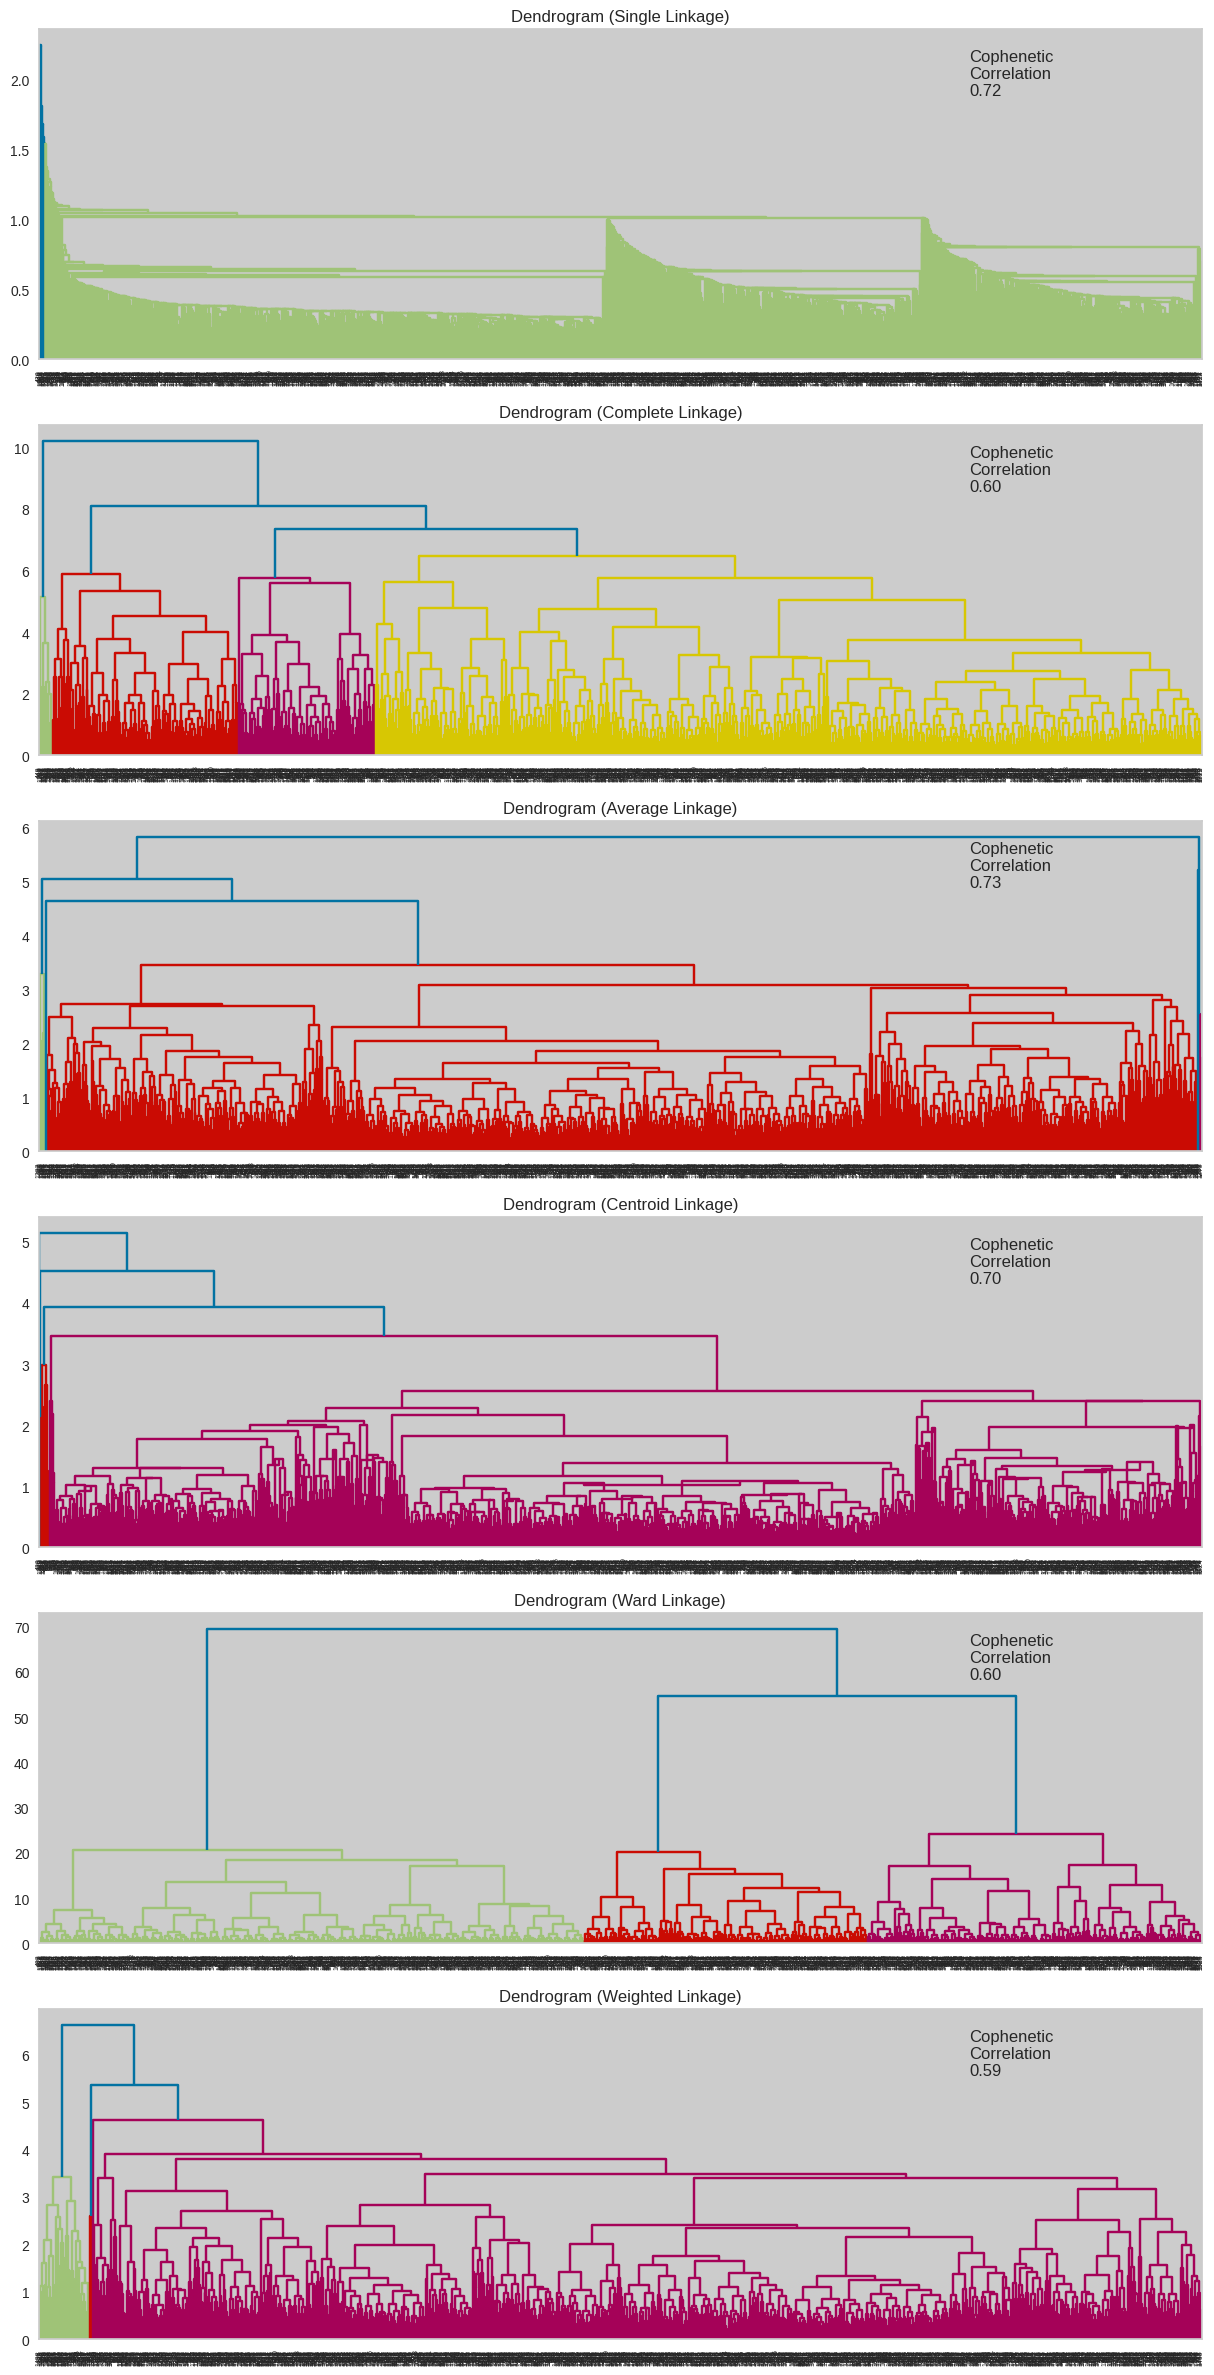

In [47]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(XScaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(XScaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [48]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(XScaled)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [49]:
XScaled["GROUP"] = HCmodel.labels_
df1["GROUP"] = HCmodel.labels_

In [50]:
cluster_profile = df1.groupby("GROUP").mean()

In [51]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("GROUP")["Protein"].count().values
)

In [53]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Protein,Fat,vitaminC,Fibre,count_in_each_segments
GROUP,,,,,
0,1.554405,1.530105,0.802701,0.872957,502
1,0.630631,0.561205,0.611007,0.597900,819
2,0.738433,0.808987,1.572435,1.517515,425


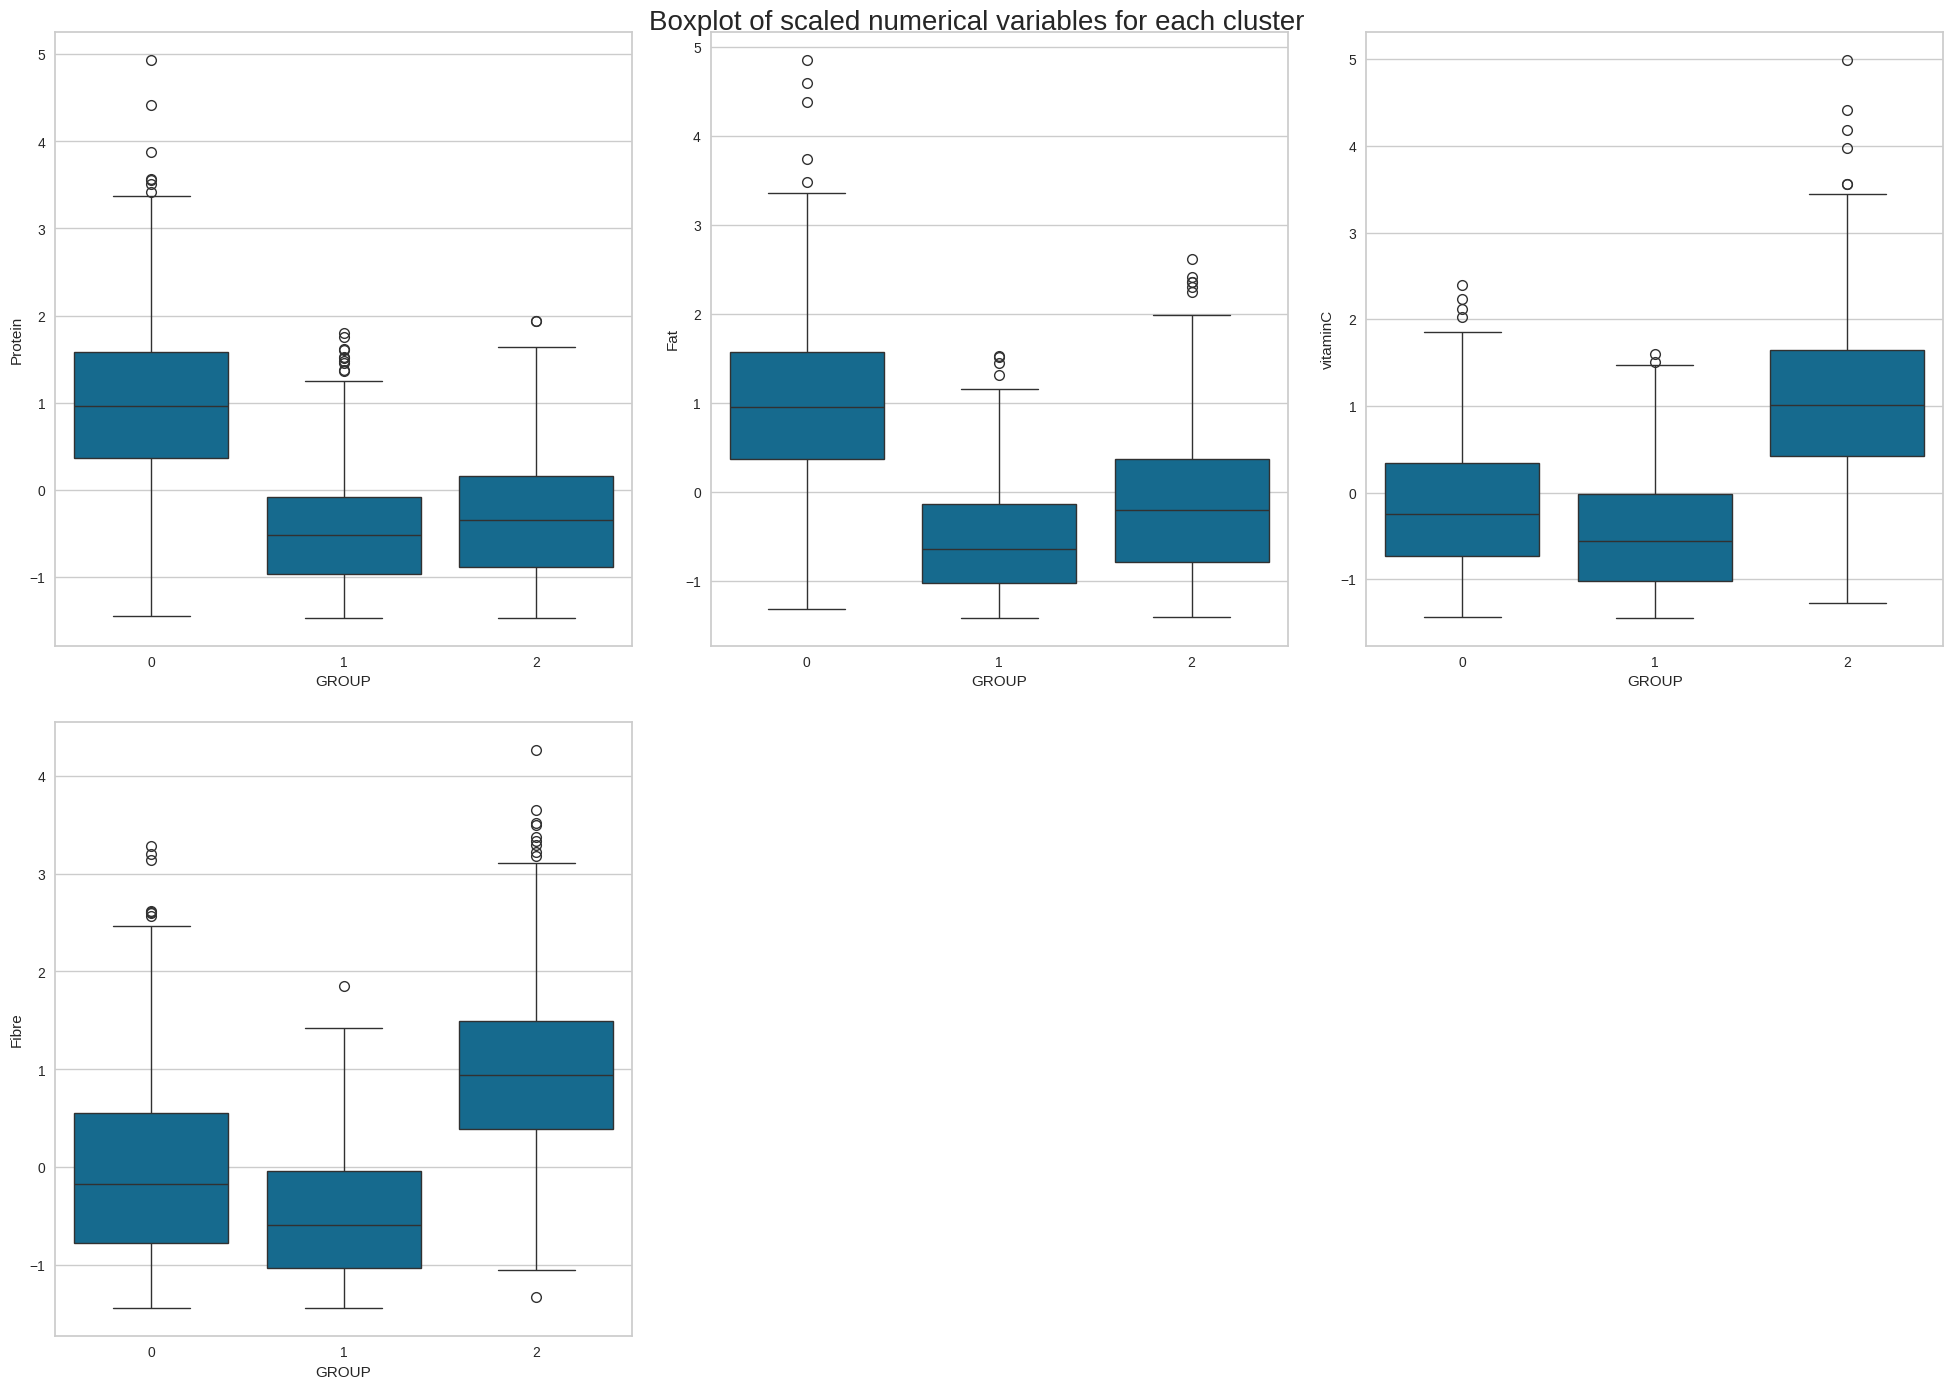

In [54]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=XScaled, x="GROUP", y=variable)

plt.tight_layout(pad=2.0)

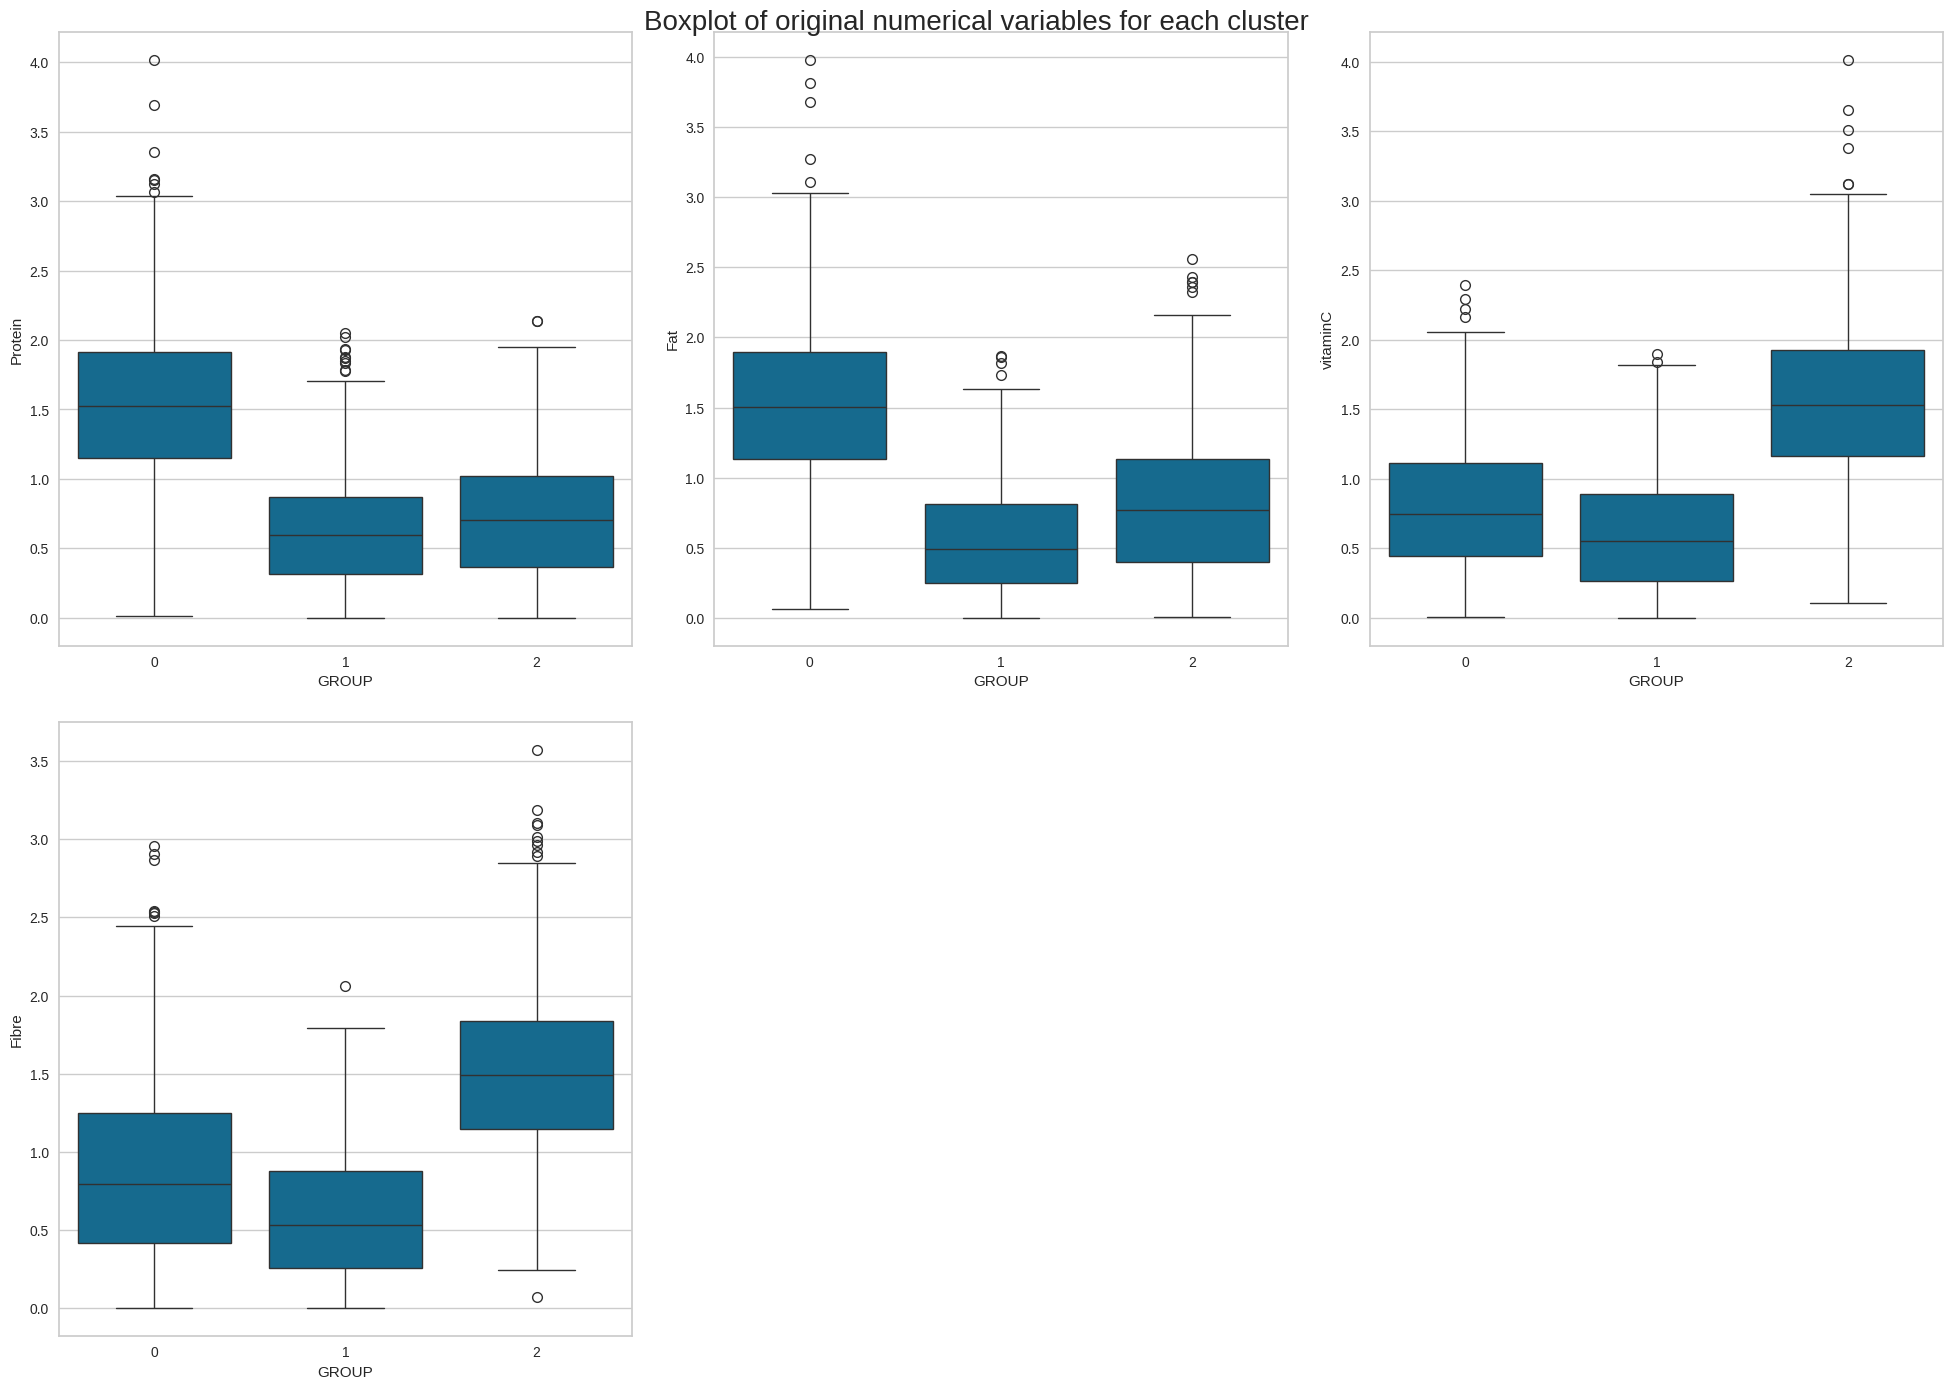

In [55]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df1, x="GROUP", y=variable)

plt.tight_layout(pad=2.0)